In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers.core import Dense,Activation,Flatten
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image

In [2]:
#load data
(train_x, train_y), (test_x,test_y)= mnist.load_data()

#split the data
num_train = 2000
train_x = train_x[:num_train]
train_y = train_y[:num_train]

num_test = 2000
test_x = test_x[:num_test]
test_y = test_y[:num_test]

In [3]:
#convert input to one hot
np.set_printoptions(linewidth=200)
#print(np.array(train_x[0]))
x = np.array([[[1 if dd>0 else 0 for dd in m] for m in x] for x in train_x])
x_test = np.array([[[1 if dd>0 else 0 for dd in m] for m in x] for x in test_x])
#print(np.array(x[0]))

#convert target to one hot
#print(train_y[0])
y = tf.keras.utils.to_categorical(train_y)
y_test =  tf.keras.utils.to_categorical(train_y) 
#print(y[0])

In [5]:
 num_uotput = y.shape[1]

 #model
 model = Sequential()

 model.add(Flatten(input_shape=(28,28)))
 model.add(Dense(512, activation='relu'))
 model.add(Dense(256, activation='relu'))
 model.add(Dense(128, activation='relu'))
 model.add(Dense(64, activation='relu'))
 
 model.add(Dense(num_uotput))
 model.add(Activation('sigmoid'))

 model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 history = model.fit(x,y, validation_data=(x_test,y_test), batch_size=1, epochs=10)

Epoch 1/10
2000/2000 [==============================] - 12s 6ms/step - loss: 0.1501 - accuracy: 0.7075 - val_loss: 1.1204 - val_accuracy: 0.1020
Epoch 2/10
2000/2000 [==============================] - 11s 5ms/step - loss: 0.0697 - accuracy: 0.8785 - val_loss: 1.3299 - val_accuracy: 0.1010
Epoch 3/10
2000/2000 [==============================] - 11s 6ms/step - loss: 0.0547 - accuracy: 0.9065 - val_loss: 1.4635 - val_accuracy: 0.1010
Epoch 4/10
2000/2000 [==============================] - 11s 6ms/step - loss: 0.0447 - accuracy: 0.9315 - val_loss: 1.6024 - val_accuracy: 0.0980
Epoch 5/10
2000/2000 [==============================] - 11s 6ms/step - loss: 0.0382 - accuracy: 0.9480 - val_loss: 1.9494 - val_accuracy: 0.1025
Epoch 6/10
2000/2000 [==============================] - 11s 6ms/step - loss: 0.0310 - accuracy: 0.9520 - val_loss: 2.5593 - val_accuracy: 0.0945
Epoch 7/10
2000/2000 [==============================] - 11s 5ms/step - loss: 0.0279 - accuracy: 0.9555 - val_loss: 2.6955 - val_ac

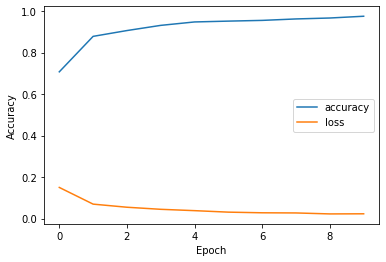

In [6]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

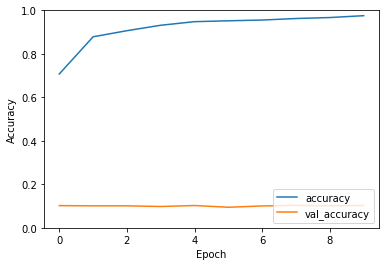

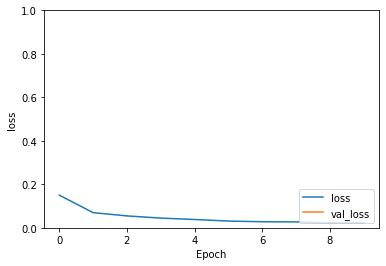

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()